## Building Convolutional Neural Networks

# Fashion Classification
Train CNN on 60,000 Fashion MNIST images(data in np array)

Test CNN on 10,000 Fashion MNIST images(data in np array) 

##Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import keras

##Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

In [8]:
class_labels = ["T-Shirt/top", "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , 
"""
0 => T-Shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle Boot
"""
]


##Show Image

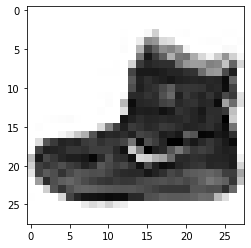

In [9]:
plt.imshow(X_train[0] , cmap = 'Greys')

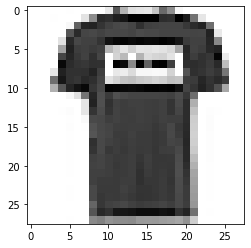

In [10]:
plt.imshow(X_train[1] , cmap = 'Greys')

In [11]:
y_test[1]

2

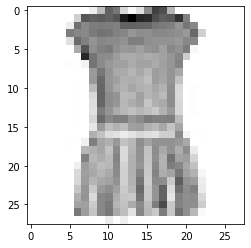

In [12]:
plt.imshow(X_train[3] , cmap = 'Greys')

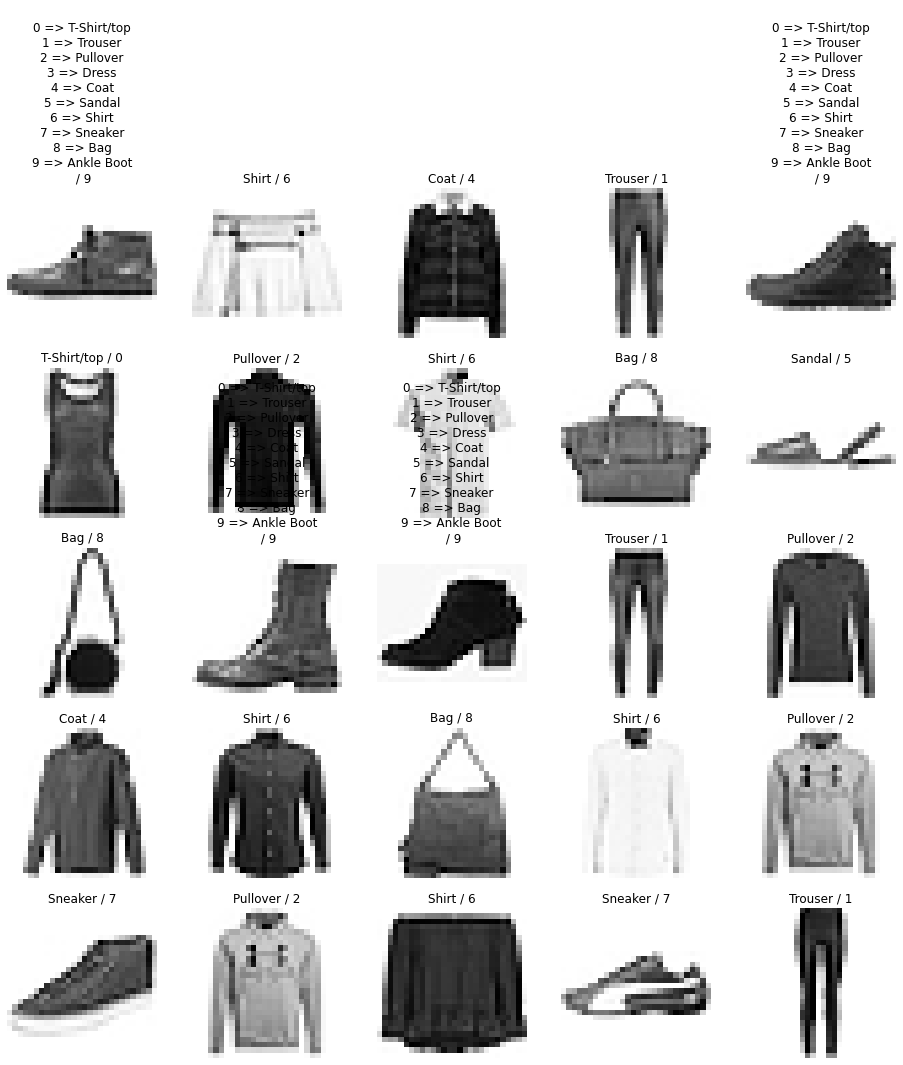

In [13]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i] , cmap = 'Greys' )
  plt.axis('off') #off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

##Change Dimension

In [14]:
X_train.ndim

3

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train = np.expand_dims(X_train , -1)
X_test = np.expand_dims(X_test , -1)

In [17]:
X_train.ndim

4

In [18]:
X_train.shape

(60000, 28, 28, 1)

## Feature Scaling

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Split Dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size = 0.2 , random_state = 2020)

In [22]:
X_train.shape , y_train.shape

((48000, 28, 28, 1), (48000,))

In [23]:
X_val.shape , y_val.shape

((12000, 28, 28, 1), (12000,))

## Convolutional Neural Network - Model Building

In [24]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 32 , kernel_size = 3 , strides = (1,1) , padding = 'valid' , activation ='relu' ,  input_shape = [28,28,1]),
                         keras.layers.MaxPooling2D(pool_size = (2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128 , activation = "relu"),
                         keras.layers.Dense(units = 10 , activation = "softmax"),
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [27]:
model.fit(X_train , y_train , epochs = 10 , batch_size= 512 , verbose = 1 , validation_data=(X_val , y_val))

Epoch 1/10
94/94 [==============================] - 1s 10ms/step - loss: 0.6341 - accuracy: 0.7910 - val_loss: 0.4254 - val_accuracy: 0.8483
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3669 - accuracy: 0.8728 - val_loss: 0.3656 - val_accuracy: 0.8721
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3160 - accuracy: 0.8898 - val_loss: 0.3312 - val_accuracy: 0.8842
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2910 - accuracy: 0.8969 - val_loss: 0.3157 - val_accuracy: 0.8887
Epoch 5/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2704 - accuracy: 0.9038 - val_loss: 0.3137 - val_accuracy: 0.8915
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2549 - accuracy: 0.9100 - val_loss: 0.2928 - val_accuracy: 0.8992
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2383 - accuracy: 0.9148 - val_loss: 0.2814 - val_accuracy: 0.9016
Epoch 8/10
94/94 [=

## Test the Model

In [28]:
model.predict(np.expand_dims(X_test[0] , axis =0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

In [29]:
np.argmax(model.predict(np.expand_dims(X_test[0] , axis =0)).round(2))

9

In [30]:
y_test[0]

9

In [31]:
y_pred = model.predict(X_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.01, ..., 0.07, 0.1 , 0.01]], dtype=float32)

In [32]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2748 - accuracy: 0.8996


[0.27478480339050293, 0.8996000289916992]

## Visualize Output

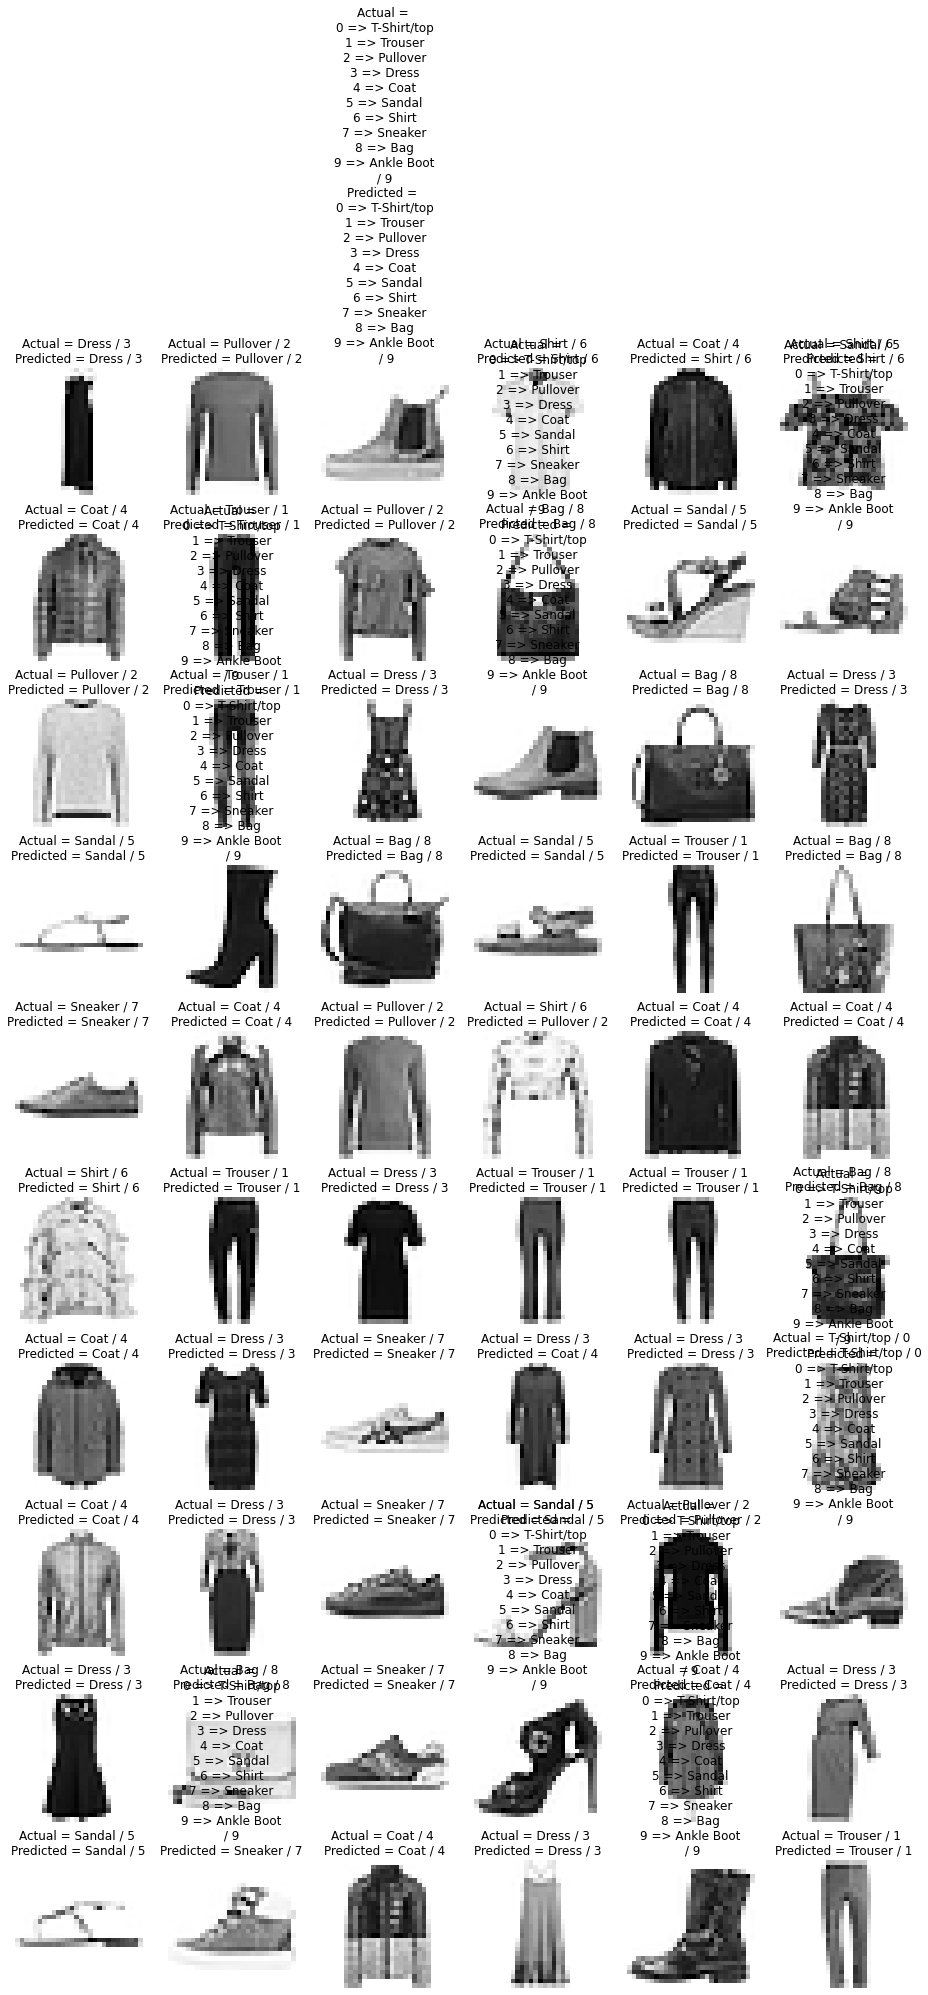

In [33]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28) , cmap= 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i] , class_labels[np.argmax(y_pred[i])] , np.argmax(y_pred[i])))
  plt.axis("off")

## Confusion Matrix

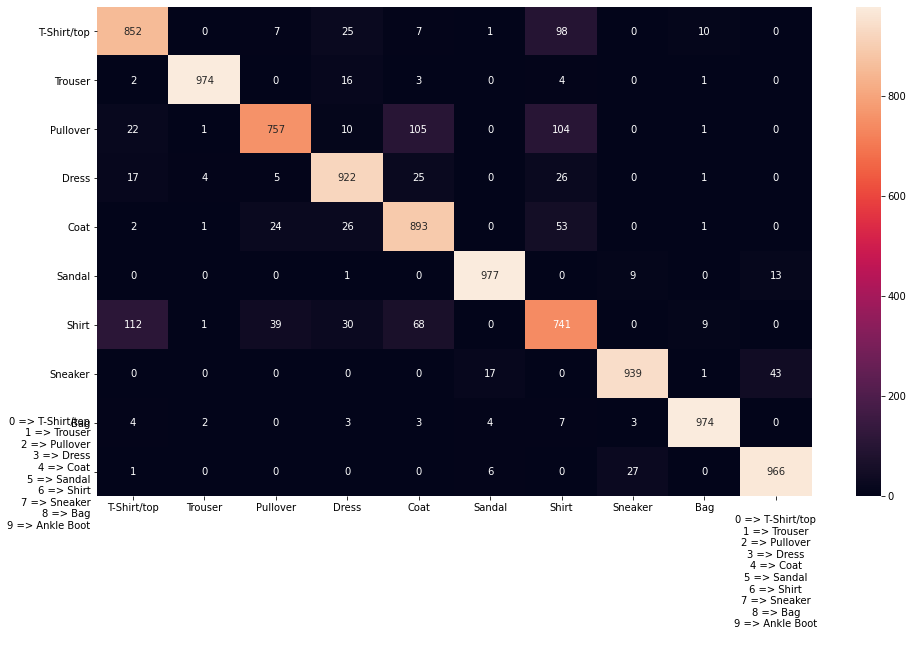

In [34]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test , y_pred_labels)

#show cm
sns.heatmap(cm , annot = True , fmt = 'd' , xticklabels = class_labels , yticklabels = class_labels )

In [35]:
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_pred_labels , target_names = class_labels)
print(cr)

                                                                                                                                 precision    recall  f1-score   support

                                                                                                                    T-Shirt/top       0.84      0.85      0.85      1000
                                                                                                                        Trouser       0.99      0.97      0.98      1000
                                                                                                                       Pullover       0.91      0.76      0.83      1000
                                                                                                                          Dress       0.89      0.92      0.91      1000
                                                                                                                           Coat       0.81      0.89      

## Save the Model

In [36]:
model.save('fashion_classification_cnn_model.h5')

In [37]:
path = '/content/drive/MyDrive/fashion_classification_cnn_model_v2.h5'

model.save(path)

In [38]:
model_deploy = keras.models.load_model('fashion_classification_cnn_model.h5')

In [39]:
model_deploy.predict(X_test).round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.01, ..., 0.07, 0.1 , 0.01]], dtype=float32)

In [40]:
model_deploy.predict(np.expand_dims(X_test[0] , axis = 0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

In [41]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[0] , axis = 0)).round(2))

9

## Convolutional Neural Network - Building Complex Model

In [43]:
#Building CNN Model

cnn_model_2 = keras.models.Sequential([
                           keras.layers.Conv2D(filters=32 , kernel_size=3 , strides=(1,1) , padding='valid' , activation='relu' , input_shape = [28,28,1]),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Conv2D(filters=64 , kernel_size=3 , strides=(2,2) , padding='same' , activation= 'relu'),
                           keras.layers.MaxPooling2D(pool_size = (2,2)),
                           keras.layers.Flatten(),
                           keras.layers.Dense(units=128 , activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=256 , activation='relu'),
                           keras.layers.Dropout(0.25),
                           keras.layers.Dense(units=128, activation='relu'),
                           keras.layers.Dense(units=10 , activation='softmax')
])

In [44]:
#Compile the Model

cnn_model_2.compile(optimizer='adam' , loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [45]:
#Train the Model

cnn_model_2.fit(X_train, y_train, epochs=20 ,batch_size=512 , verbose=1,validation_data=(X_val,y_val))

Epoch 1/20
94/94 [==============================] - 1s 11ms/step - loss: 1.0074 - accuracy: 0.6277 - val_loss: 0.5903 - val_accuracy: 0.7699
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.5520 - accuracy: 0.7901 - val_loss: 0.4599 - val_accuracy: 0.8250
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4670 - accuracy: 0.8261 - val_loss: 0.4116 - val_accuracy: 0.8471
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4113 - accuracy: 0.8489 - val_loss: 0.3875 - val_accuracy: 0.8544
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3694 - accuracy: 0.8633 - val_loss: 0.3532 - val_accuracy: 0.8717
Epoch 6/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3479 - accuracy: 0.8725 - val_loss: 0.3404 - val_accuracy: 0.8747
Epoch 7/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3234 - accuracy: 0.8808 - val_loss: 0.3198 - val_accuracy: 0.8805
Epoch 8/20
94/94 [=

## Test the Model

In [46]:
cnn_model_2.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2777 - accuracy: 0.8972


[0.27768054604530334, 0.8971999883651733]